## Importing Modules and Dataset

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [168]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [169]:
# Inspects the first 5 observations of our dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [170]:
# Gets a summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [171]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Fixing the datetime column

In [172]:
train["date"] = pd.to_datetime(train['datetime']).dt.date
train["time"] = pd.to_datetime(train["datetime"]).dt.hour
train["day"] = pd.to_datetime(train["datetime"]).dt.day_name()
train['day'] = pd.Categorical(train['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
train["month"] = pd.to_datetime(train["datetime"]).dt.month
train["year"] = pd.to_datetime(train["datetime"]).dt.year
train = train.drop(['datetime'], axis = 1)

In [173]:
test["date"] = pd.to_datetime(test['datetime']).dt.date
test["time"] = pd.to_datetime(test["datetime"]).dt.hour
test["day"] = pd.to_datetime(test["datetime"]).dt.day_name()
test['day'] = pd.Categorical(test['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
test["month"] = pd.to_datetime(test["datetime"]).dt.month
test["year"] = pd.to_datetime(test["datetime"]).dt.year
test = test.drop(['datetime'], axis = 1)

In [174]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000,2012.000000


### Analysing Missing Values

In [175]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
time          0
day           0
month         0
year          0
dtype: int64

In [176]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,Saturday,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,Saturday,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,Saturday,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,Saturday,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,Saturday,1,2011


## Exploratory Data Analysis

We split our attributes(features) of our dataset into three categories: 
- Our target variable, `count`
- Our categorical variables: `season`, `holiday`, `workingday`, `weather`, `year`
- Our numerical(continuous variables): `temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered`, `day`, `month`. 

### Our Target Variable

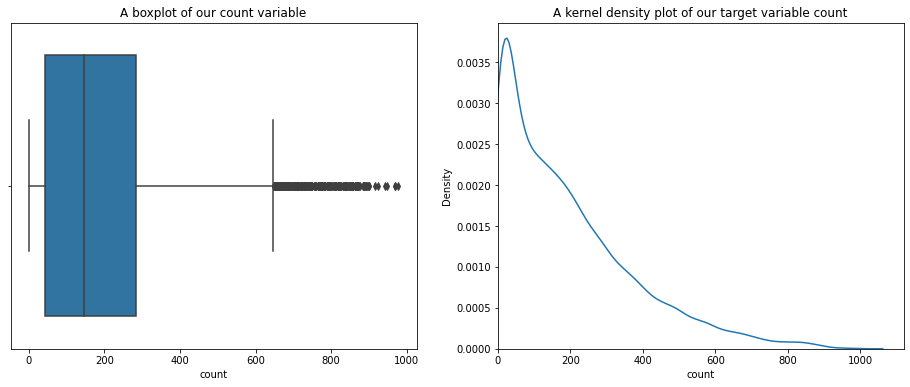

In [177]:
plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data = train, x = 'count')
plt.title("A boxplot of our count variable")
plt.subplot(1, 2, 2)
sns.kdeplot(data = train, x = 'count').set(xlim = (-0.1, None))
plt.title("A kernel density plot of our target variable count")
plt.show()

### Our categorical variables

In [178]:
categorical = ["season", "holiday", "workingday", "weather", "day", "month", "year"]
value_counts = {}
for element in categorical: 
    value_counts[element] = train[element].value_counts() /len(train["holiday"])
    value_counts[element] = value_counts[element].rename_axis(element).reset_index(name = "counts")

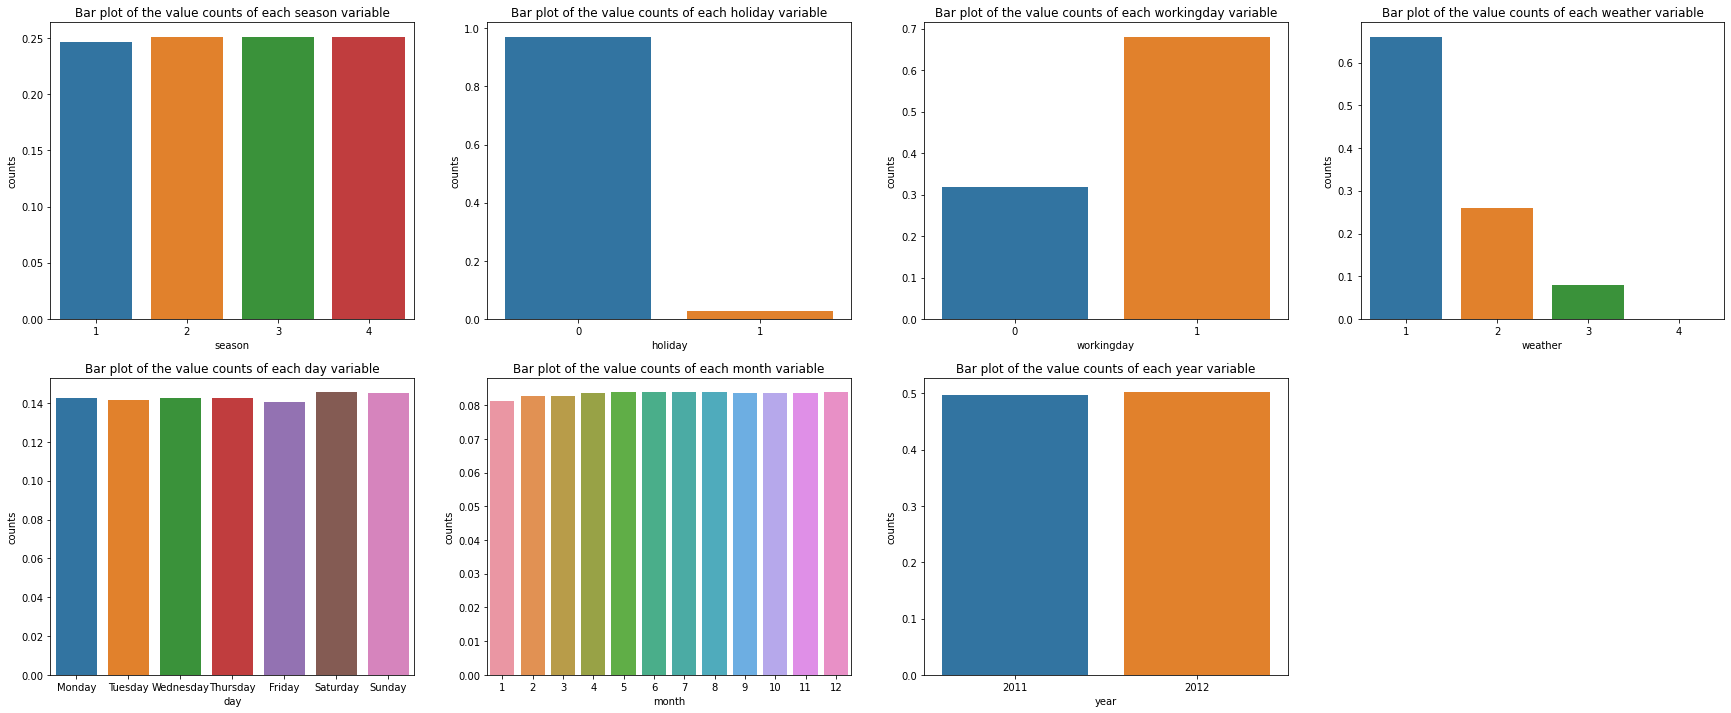

In [179]:
plt.figure(figsize = (30,12))
counter = 1
for element in categorical: 
    plt.subplot(2, 4, counter)
    sns.barplot(data = value_counts[element], x = element, y = "counts")
    plt.title(f"Bar plot of the value counts of each {element} variable")
    counter += 1

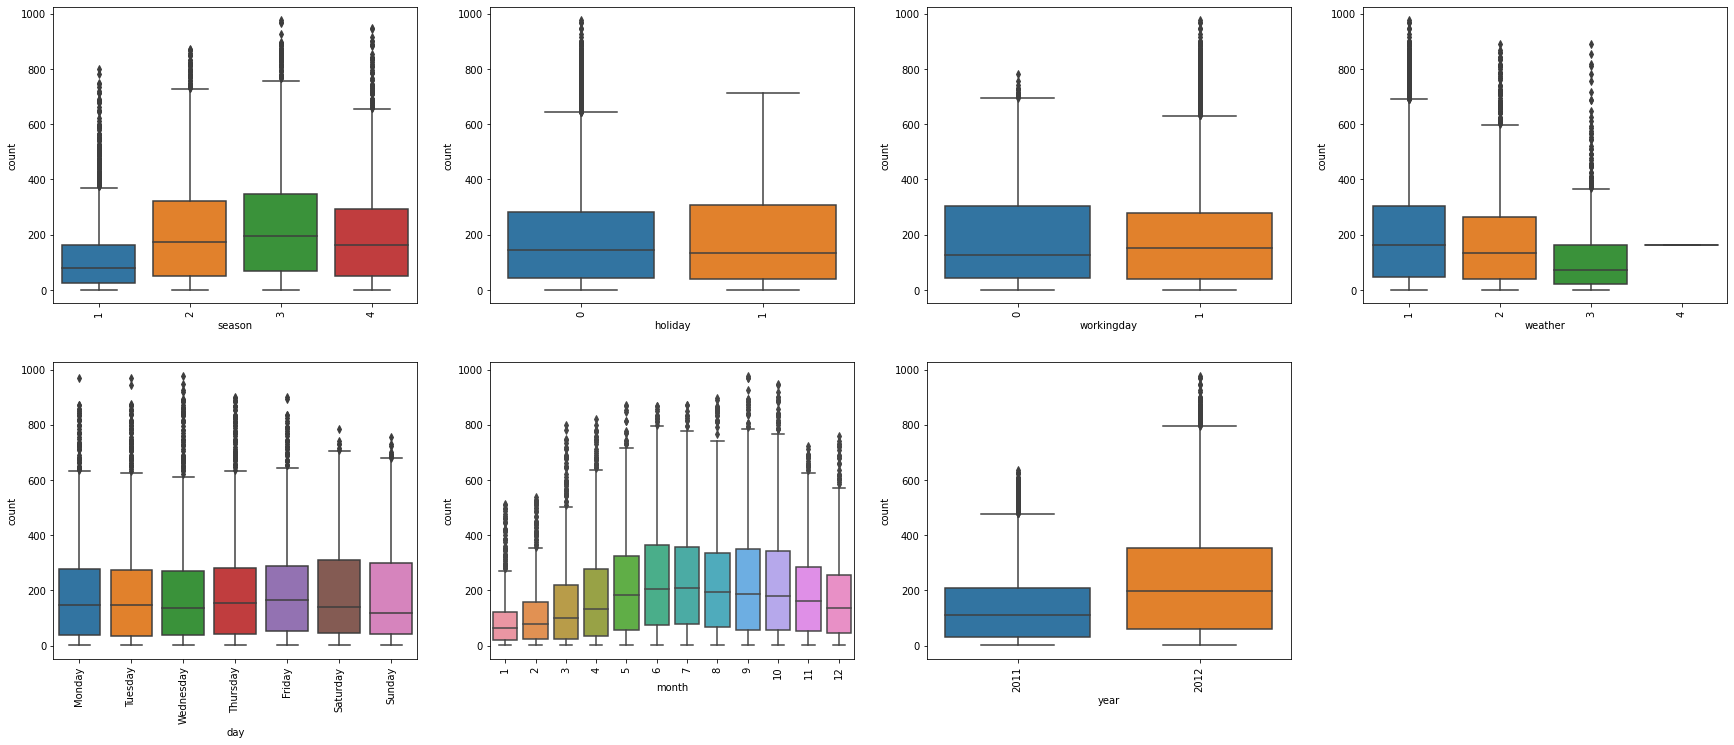

In [180]:
plt.figure(figsize = (30,12))
counter = 1
for element in categorical: 
    plt.subplot(2, 4, counter)
    sns.boxplot(x = train[element], y = train['count']).tick_params(axis = 'x', rotation = 90)
    counter += 1

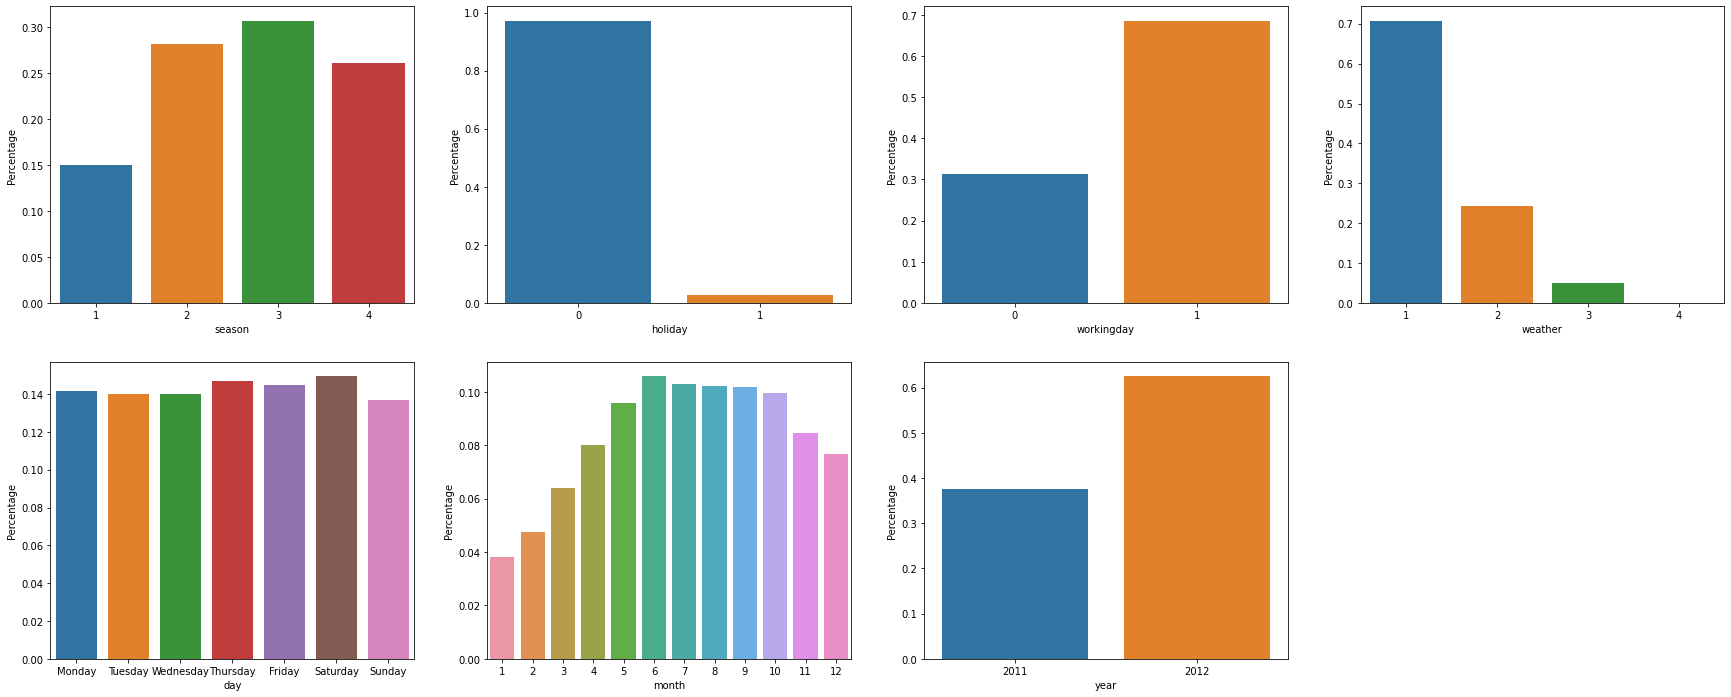

In [181]:
plt.figure(figsize = (30,12))
counter = 1
train_groupby_values = {}
for element in categorical: 
    plt.subplot(2, 4, counter)
    train_groupby_values[element] = (train.groupby([element]).sum()['count']/sum(train['count'])).reset_index(name = "Percentage")
    sns.barplot(data = train_groupby_values[element], x = element, y = "Percentage")
    counter += 1

### Our numeric variables

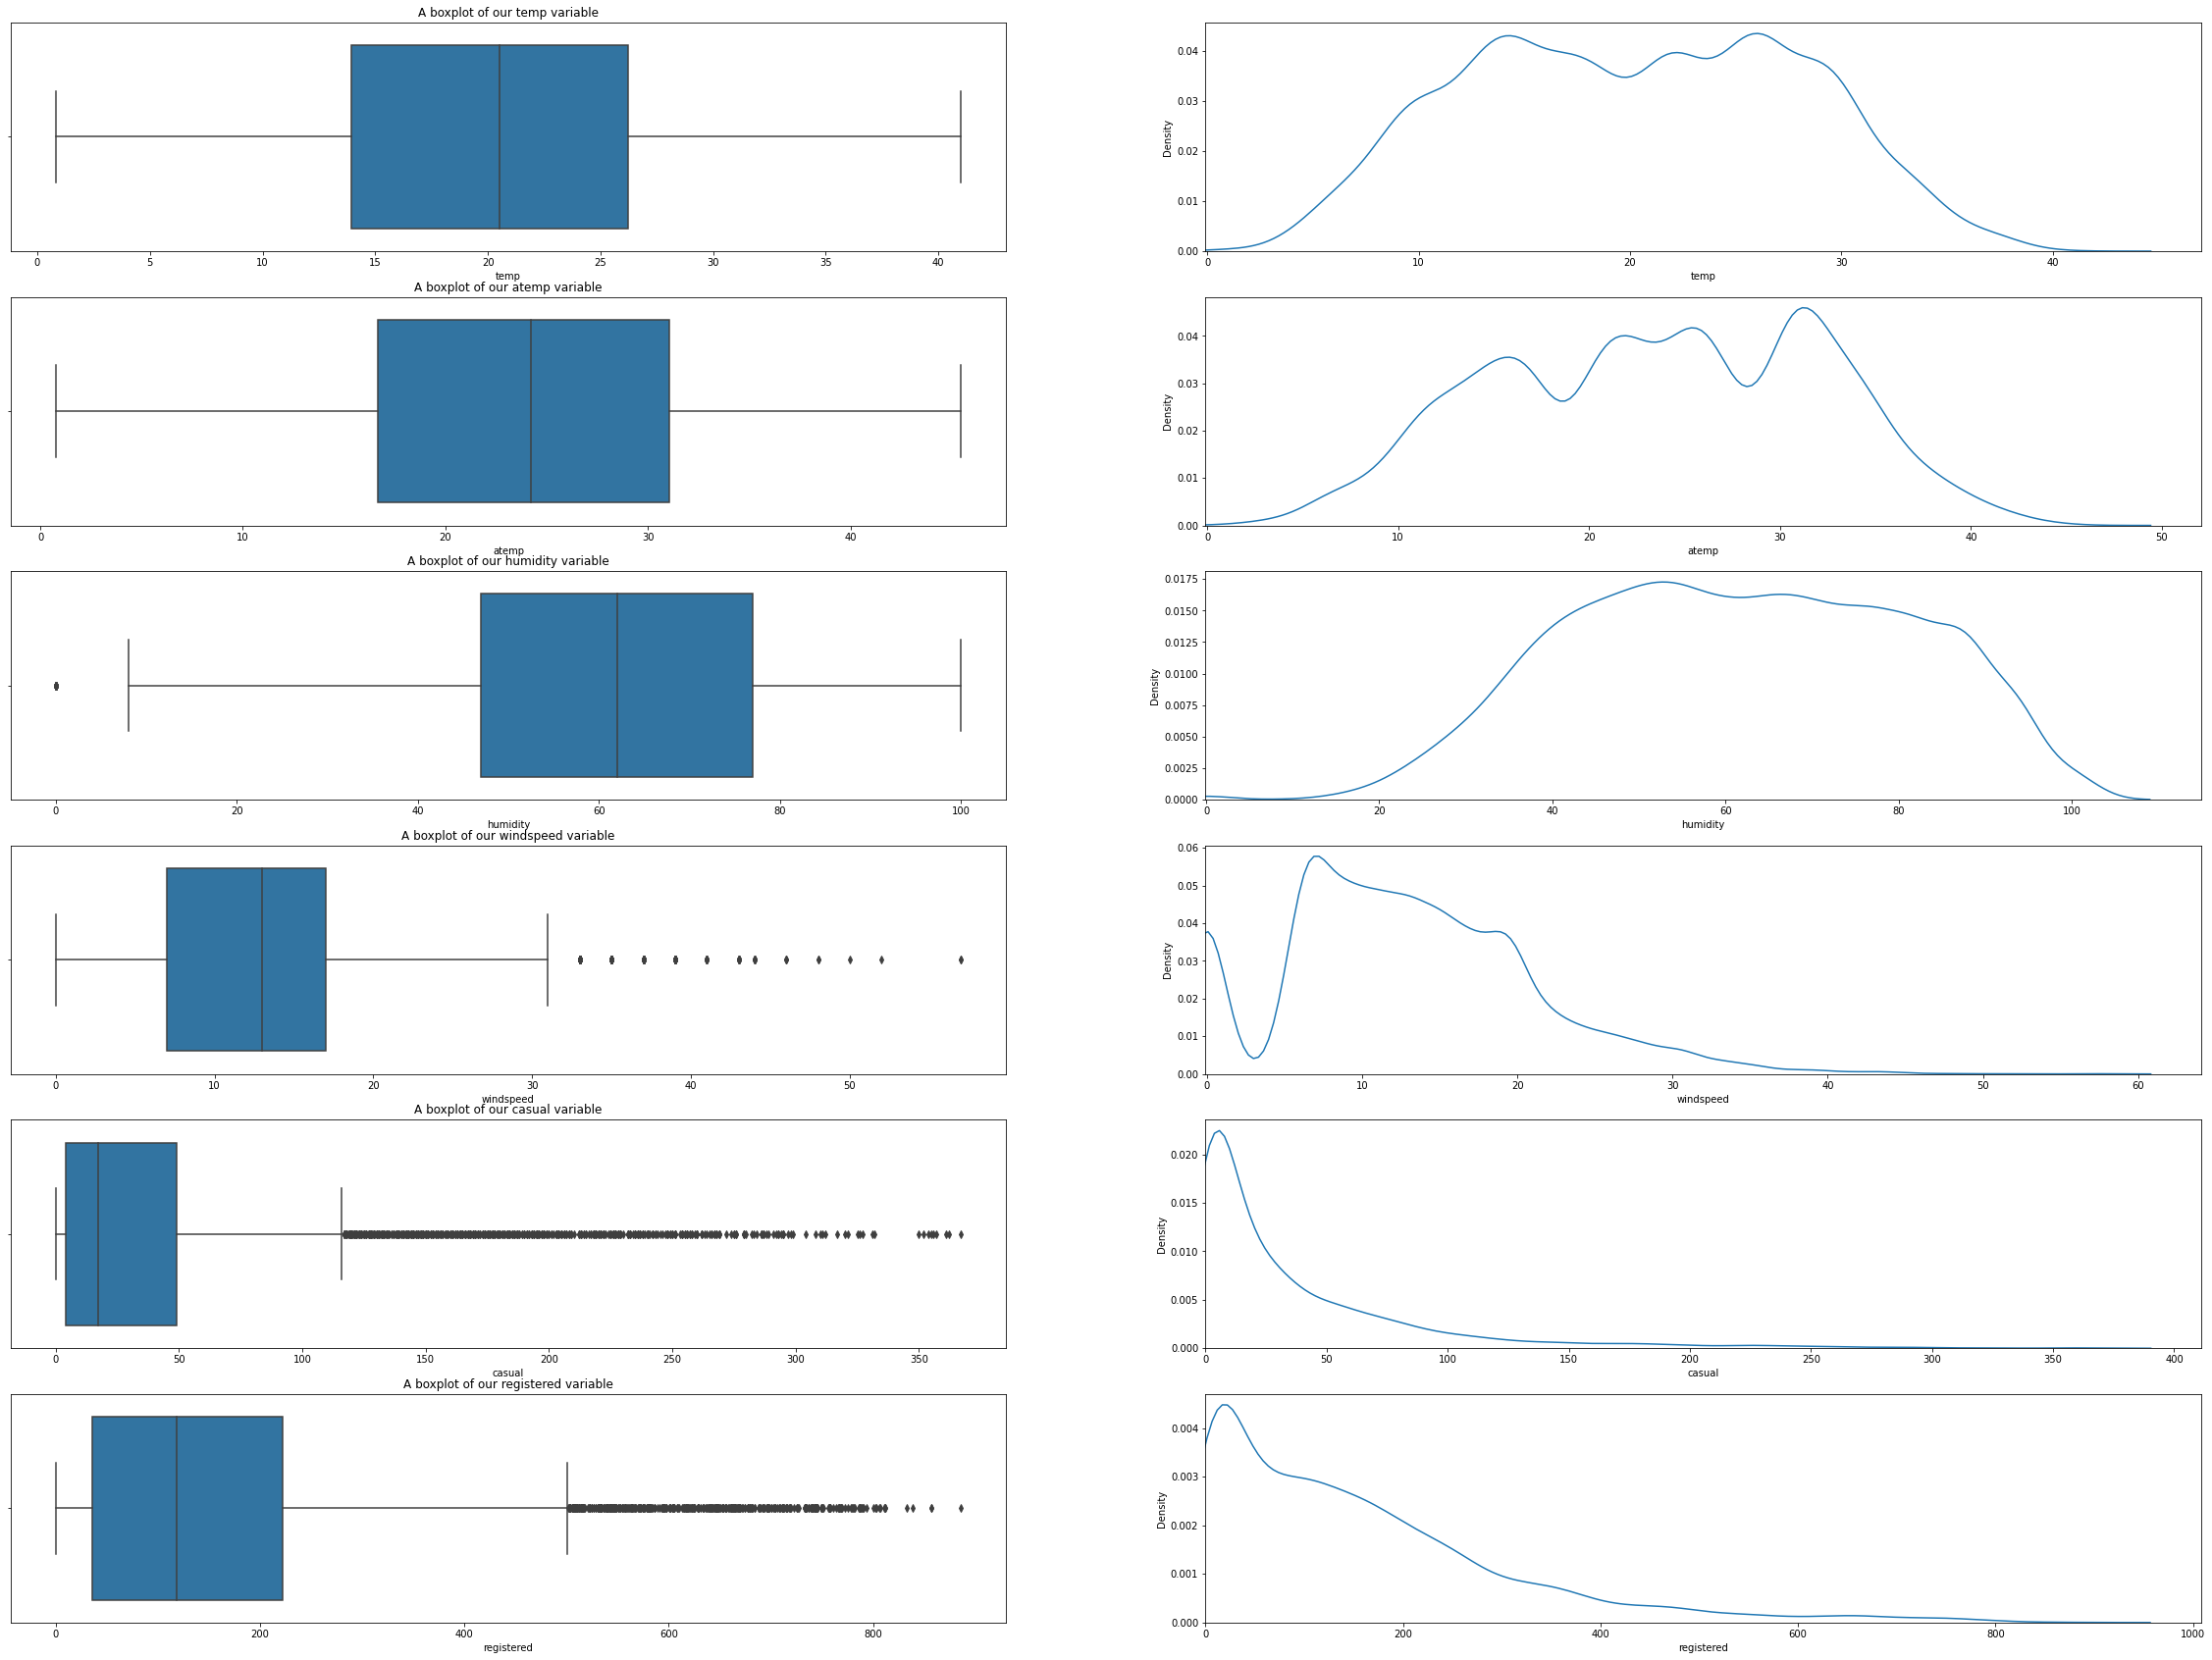

In [182]:
numerical = ["temp", "atemp", "humidity", "windspeed", "casual", "registered"]
plt.figure(figsize = (40, 30))
counter = 1
for element in numerical: 
    plt.subplot(6, 2, counter)
    sns.boxplot(data = train, x = element)
    plt.title(f"A boxplot of our {element} variable")
    plt.subplot(6, 2, counter + 1)
    sns.kdeplot(data = train, x = element).set(xlim = (-0.1, None))
    counter += 2

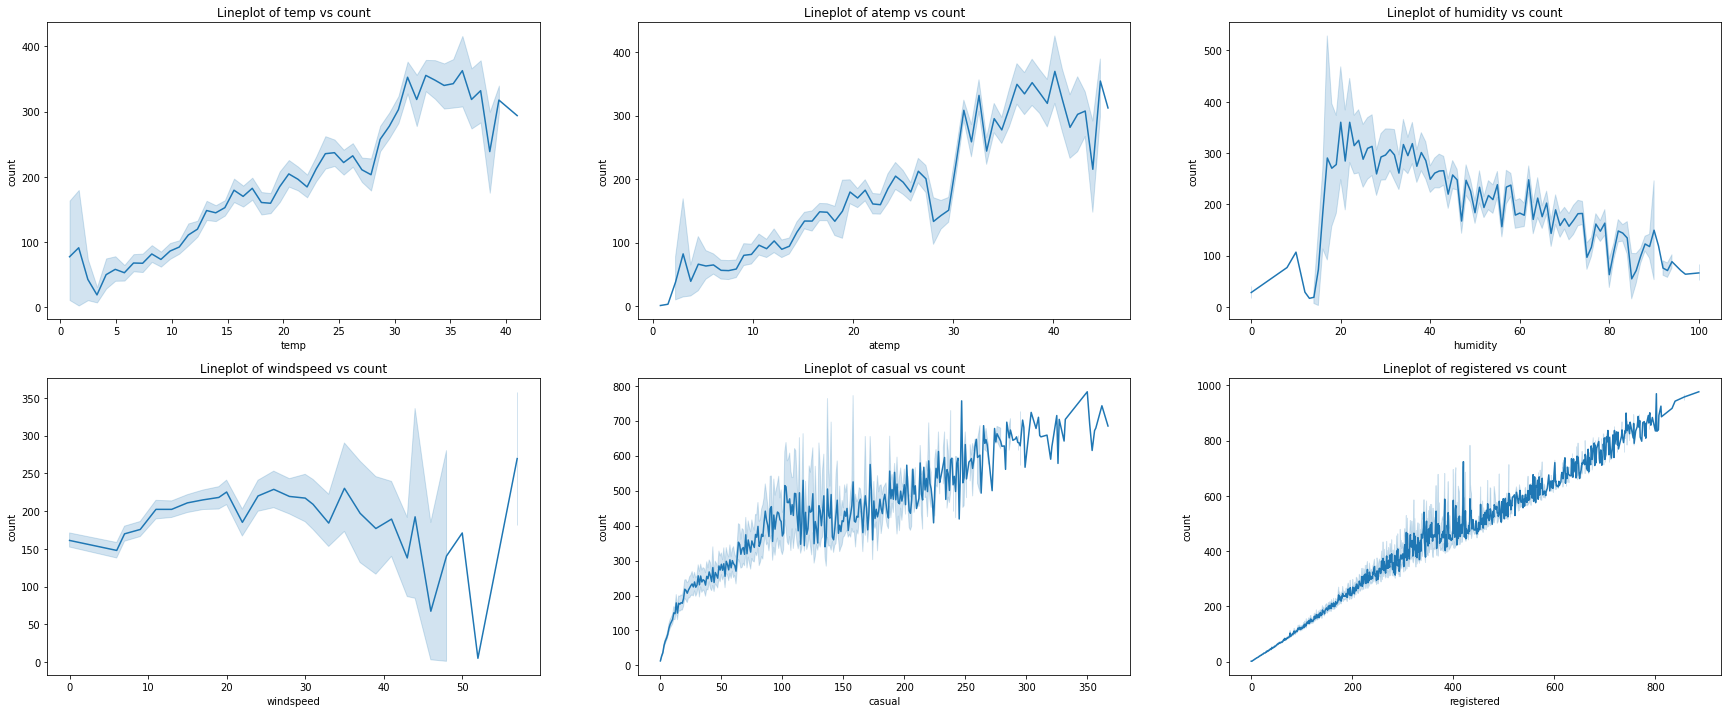

In [183]:
plt.figure(figsize = (30,12))
counter = 1
for element in numerical: 
    plt.subplot(2, 3, counter)
    sns.lineplot(x = train[element], y = train['count'])
    plt.title(f"Lineplot of {element} vs count")
    counter += 1
plt.show()

**Some Observations**
- As atemp/temp increases so too does the number of users at a given time of day. As expected, this suggests more people use bikes during summer or in the middle of the year as seen in the boxplot (categorical element vs count)
- Ignoring outliers, as humiditiy, less people would hire the bike at a given time of day. 
- The number of casual/registered users seem to correlated with the total count of a given day. 


In [184]:
train[train['year'] == 2012]['temp'].describe()

count    5464.000000
mean       20.706051
std         7.600352
min         0.820000
25%        14.760000
50%        21.320000
75%        27.060000
max        41.000000
Name: temp, dtype: float64

In [185]:
train[train['year'] == 2011]['temp'].describe()

count    5422.000000
mean       19.751988
std         7.951694
min         2.460000
25%        13.120000
50%        19.680000
75%        26.240000
max        38.540000
Name: temp, dtype: float64

### Our weather variables

In [186]:
weather_variables = ['temp', 'atemp', 'humidity', 'windspeed']
hues = ['season', 'year', 'month', 'weather']

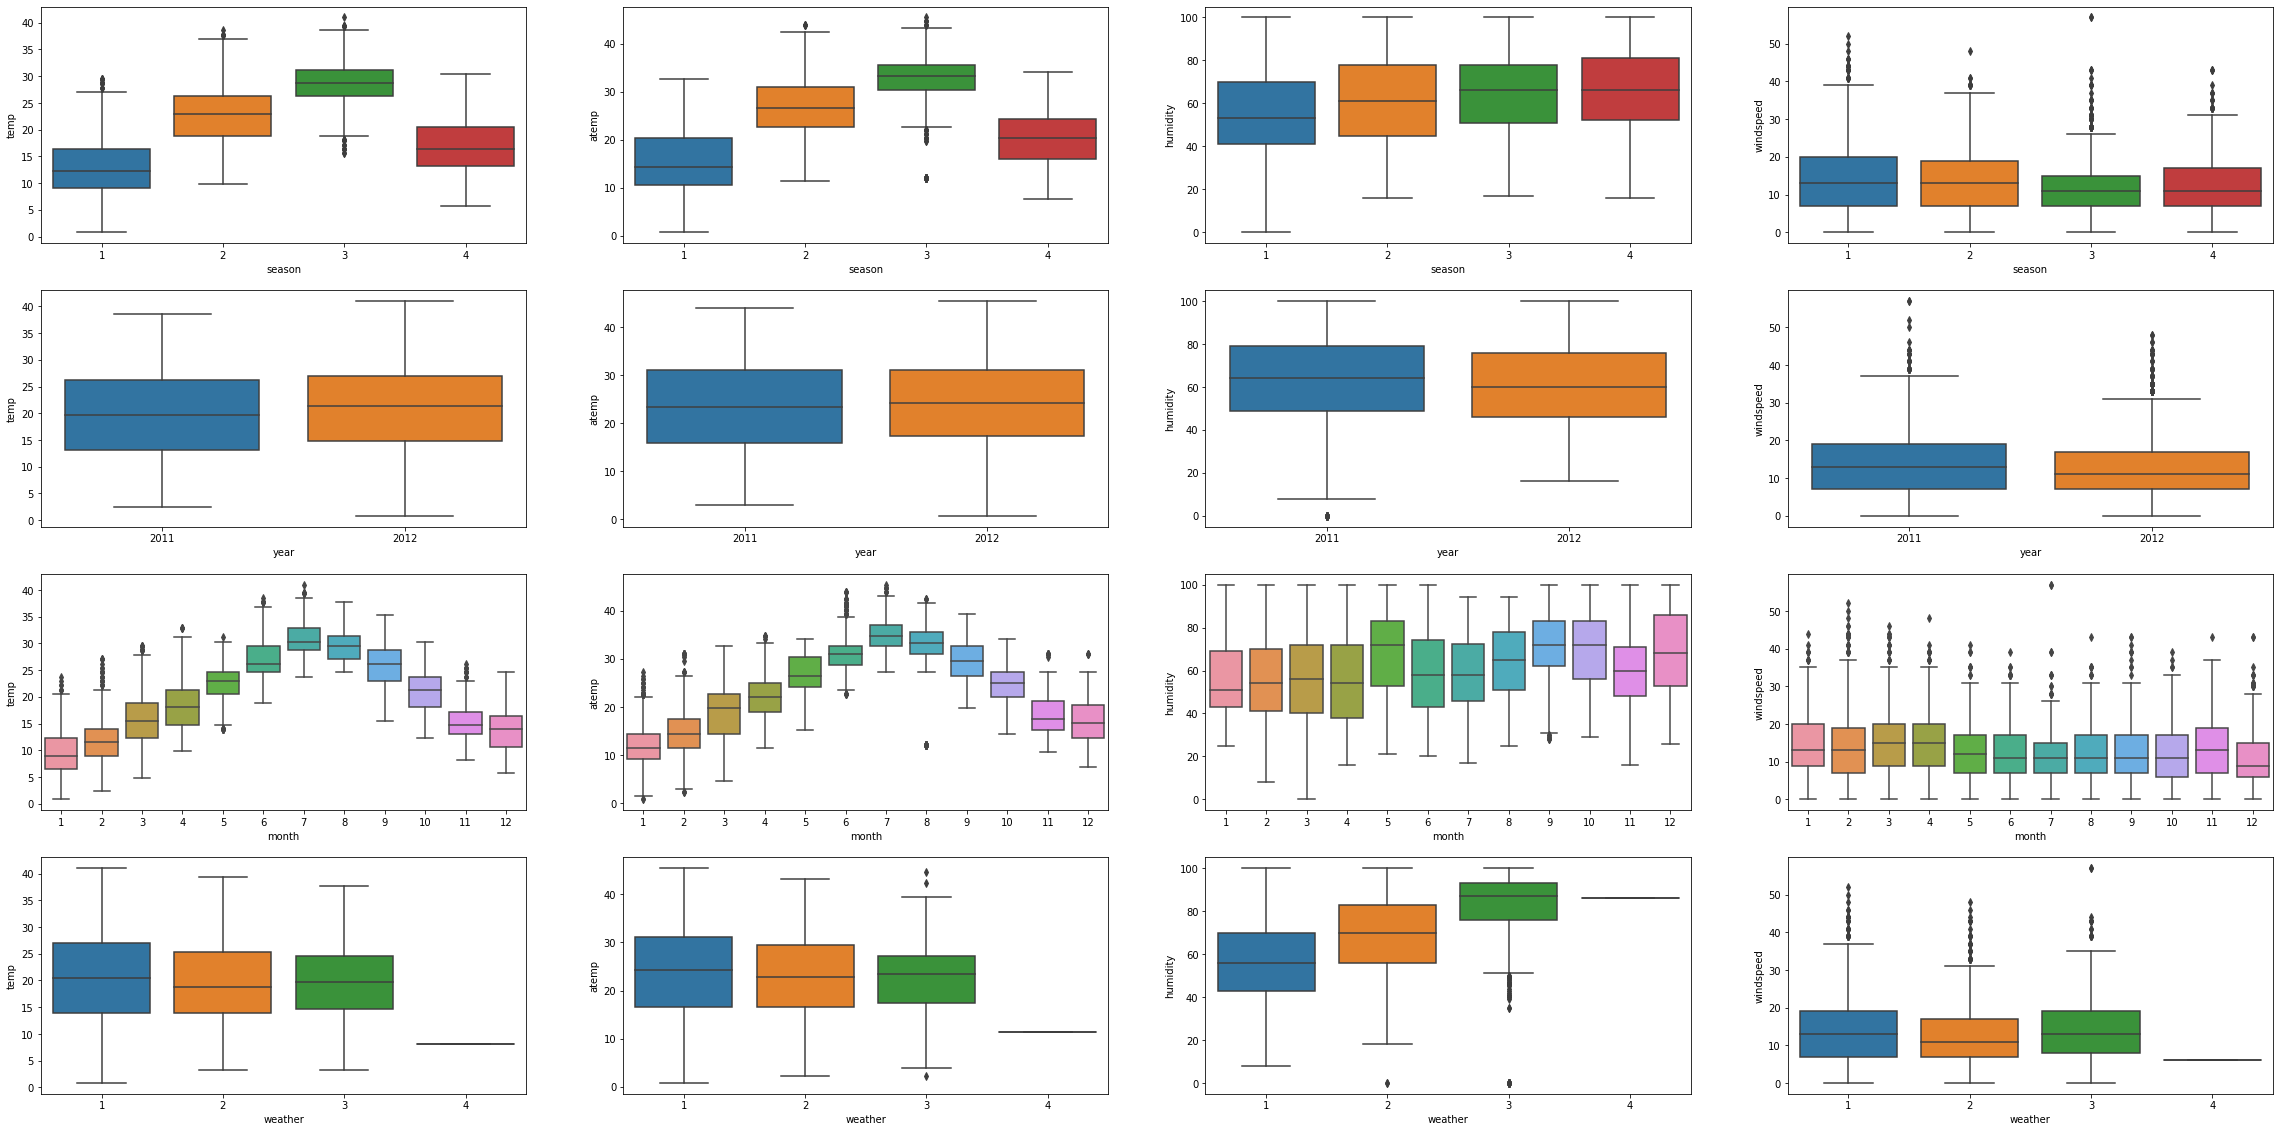

In [187]:
plt.figure(figsize = (40, 20))
counter = 1
for hue in hues: 
    for element in weather_variables: 
        plt.subplot(4, 4, counter)
        sns.boxplot(x = train[hue], y = train[element])
        counter += 1

**Observations**
- As expected, boxplot distribution of windspeed is roughly uniform for all three hues (season, year, weather). 
- We can see that the main factor that influences weather patterns was the humidity. 
- We can also see that there is a unique temperature range for each of our 4 weather seasons. This explains why the winter seasons (lower temperatures) have lower counts and summer seasons (higher temperatures) have higher counts. 
- As one would expect, there is a clear correlation between temperature and month. Thus the months with higher temperatures on average have more riders on it.
- We cannot determine any change in weather conditions through the box plot in our year variable. So we will plot a kdeplot of the weather conditions and year.  

In [188]:
current_palette = sns.color_palette("Set2")

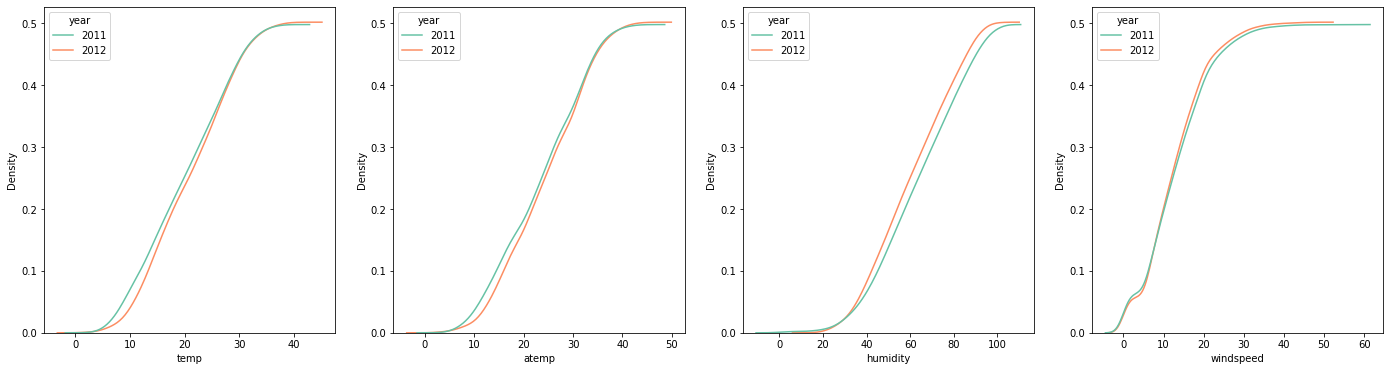

In [189]:
plt.figure(figsize = (24, 6))
counter = 1
for element in weather_variables: 
    plt.subplot(1, 4, counter)
    sns.kdeplot(x= train[element], hue = train['year'], cumulative = True, palette=current_palette[:2])
    counter += 1

**Observations:**
We can see that: 
- There were more days that were less humid in 2012 than 2011. 
- There were more days that were warmer in 2012 than 2011. 
The weather conditions look like a significant factor in explaining the uptick of ridership from 2011 to 2012.

### Humidity drops when temperatures are more than 28 degrees

<AxesSubplot:xlabel='temp', ylabel='humidity'>

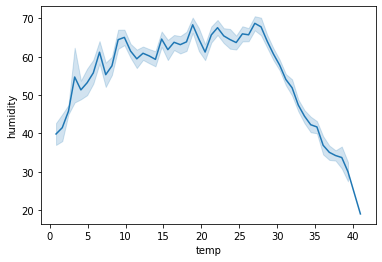

In [190]:
sns.lineplot(x = train['temp'], y = train['humidity'])




<AxesSubplot:xlabel='month', ylabel='temp'>

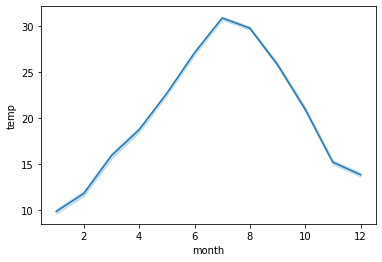

In [191]:
sns.lineplot(data = train, x = "month", y = "temp")

### Feature Engineering

In [192]:
dataset = [train, test]

#### Missing Values Analysis

We have no missing values as indicated earlier, so we don't need to apply missing values analysis for our dataset.

#### Converting the day feature from day name to day number

In [193]:
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
for element in dataset: 
    element["day_no"] = element["day"].map(day_map)

#### Dropping redundant features

In [194]:
train = train.drop(['day'], axis = 1)
test = test.drop(['day'], axis = 1)

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [196]:
train_scaled = train.copy()
test_scaled = test.copy()

In [197]:
train_scaled_list = []
for element in train.columns: 
    if (element != 'date'): 
        train_scaled_list.append(element)
train_scaled[train_scaled_list] = StandardScaler().fit_transform(train[train_scaled_list])

In [198]:
test_scaled_list = []
for element in test.columns: 
    if (element != 'date'): 
        test_scaled_list.append(element)
test_scaled[test_scaled_list] = StandardScaler().fit_transform(test[test_scaled_list])

In [199]:
train_scaled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,month,year,day_no
0,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.969294,2011-01-01,-1.668944,-1.603121,-1.003866,0.990793
1,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.836797,2011-01-01,-1.524341,-1.603121,-1.003866,0.990793
2,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,-0.880962,2011-01-01,-1.379739,-1.603121,-1.003866,0.990793
3,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,-0.985856,2011-01-01,-1.235137,-1.603121,-1.003866,0.990793
4,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,-1.052104,2011-01-01,-1.090534,-1.603121,-1.003866,0.990793


In [200]:
train_scaled_list = []
for element in train.columns: 
    if (element != 'date'): 
        train_scaled_list.append(element)

In [201]:
test_scaled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,time,month,year,day_no
0,-1.368527,-0.17315,0.676844,-0.673687,-1.235966,-1.440193,-0.421172,1.620888,2011-01-20,-1.671785,-1.622849,-1.007265,-0.003624
1,-1.368527,-0.17315,0.676844,-0.673687,-1.235966,-1.181711,-0.421172,-1.531139,2011-01-20,-1.527109,-1.622849,-1.007265,-0.003624
2,-1.368527,-0.17315,0.676844,-0.673687,-1.235966,-1.181711,-0.421172,-1.531139,2011-01-20,-1.382433,-1.622849,-1.007265,-0.003624
3,-1.368527,-0.17315,0.676844,-0.673687,-1.235966,-1.267682,-0.421172,-0.197558,2011-01-20,-1.237757,-1.622849,-1.007265,-0.003624
4,-1.368527,-0.17315,0.676844,-0.673687,-1.235966,-1.267682,-0.421172,-0.197558,2011-01-20,-1.093081,-1.622849,-1.007265,-0.003624


In [35]:
train_scaled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,month,year,day_no
0,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.993213,0.0,0.008174,0.014673,0.015369,2011-01-01,0.000000,0.0,0.0,0.833333
1,0.0,0.0,0.0,0.0,-1.438907,-1.182421,0.941249,0.0,0.021798,0.036117,0.039959,2011-01-01,0.043478,0.0,0.0,0.833333
2,0.0,0.0,0.0,0.0,-1.438907,-1.182421,0.941249,0.0,0.013624,0.030474,0.031762,2011-01-01,0.086957,0.0,0.0,0.833333
3,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.681430,0.0,0.008174,0.011287,0.012295,2011-01-01,0.130435,0.0,0.0,0.833333
4,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.681430,0.0,0.000000,0.001129,0.000000,2011-01-01,0.173913,0.0,0.0,0.833333


### Feature Selection

We will first implement filter-based feature selection. There are two methods to do this: 
- Variance Threshold : Univariate Selection
- Correlation Heatmap : Bivariate Selection

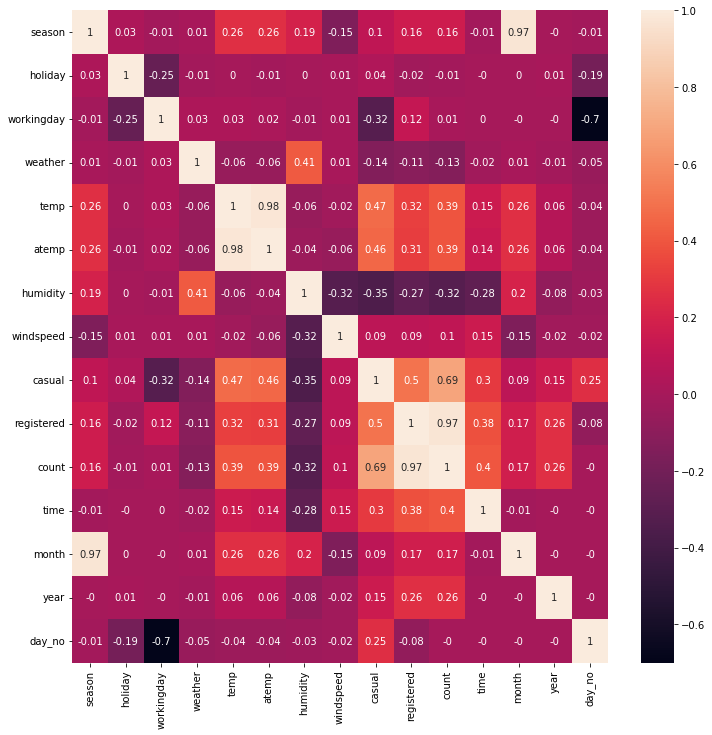

In [202]:
plt.figure(figsize = (12, 12))
corr = train_scaled.corr().round(2)
sns.heatmap(corr, annot = True)
plt.show()

We can see that the `temp` variable and the `atemp` variable is highly correlated. We will remove one of these features. We know that the `temp` variable looks more correlated to our three target variables, `casual`, `registered` and `count`. Therefore we will remove the `atemp` feature from our dataset. 

We can see that the `season` variable and the `month` variable is highly correlated. We will remove one of these features. We know that the `month` variable has a lower correlation to casuals but higher correlation to registered and the overall count. Now let's plot the number of casuals vs number of registered users.

Firstly let's plot a pie chart that shows the sum of the total users that are registered and are casuals. 

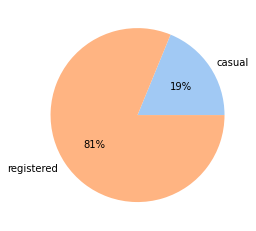

In [203]:
labels = ['casual', 'registered']
data = []
for label in labels: 
    sum_value = train[label].sum()
    data.append(sum_value)
colors = sns.color_palette('pastel')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct = "%.0f%%")
plt.show()

Secondly, lets plot the date versus the count of registered users and the count of casual users. 

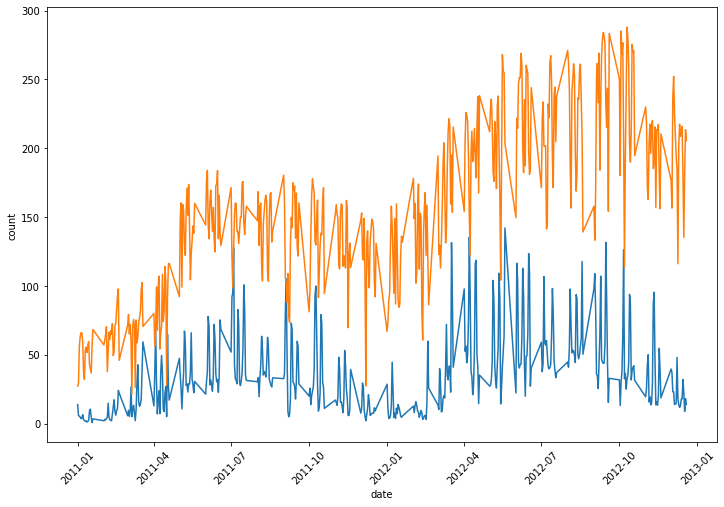

In [204]:
plt.figure(figsize = (12, 8))
for label in labels:
    sns.lineplot(x = train['date'], y = train[label], ci = None)
plt.ylabel("count")
plt.xticks(rotation = 45)
plt.show()

From these two graphs we observe two points in that: 
- The total number of registered users is much greater than the total number of casual users
- For each observation that the number of registered users is greater than the number of casual users. 

Since we know that: 
$$\verb|count| = \verb|registered| + \verb|casual|$$
and that the registered variable contributes much more to our $\verb|count|$ variable we can conclude that we want the `month` variable. 

In [205]:
train_scaled = train_scaled.drop(['season', 'atemp'], axis = 1)
test_scaled = test_scaled.drop(['season', 'atemp'], axis = 1)

In [206]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [207]:
y_train_total = train_scaled['count']
y_train_casual = train_scaled['casual']
y_train_registered = train_scaled['registered']
date_train = train_scaled['date']
date_test = test_scaled['date']
X_train = train_scaled.drop(['count', 'casual', 'registered', 'date'], axis = 1)
X_test = test_scaled.drop(['date'], axis = 1)

In [208]:
X_test

,holiday,workingday,weather,temp,humidity,windspeed,time,month,year,day_no
0,-0.17315,0.676844,-0.673687,-1.235966,-0.421172,1.620888,-1.671785,-1.622849,-1.007265,-0.003624
1,-0.17315,0.676844,-0.673687,-1.235966,-0.421172,-1.531139,-1.527109,-1.622849,-1.007265,-0.003624
2,-0.17315,0.676844,-0.673687,-1.235966,-0.421172,-1.531139,-1.382433,-1.622849,-1.007265,-0.003624
3,-0.17315,0.676844,-0.673687,-1.235966,-0.421172,-0.197558,-1.237757,-1.622849,-1.007265,-0.003624
4,-0.17315,0.676844,-0.673687,-1.235966,-0.421172,-0.197558,-1.093081,-1.622849,-1.007265,-0.003624
...,...,...,...,...,...,...,...,...,...,...
6488,-0.17315,0.676844,0.868714,-1.235966,-0.213831,-0.197558,1.077060,1.584898,0.992787,-1.505456
6489,-0.17315,0.676844,0.868714,-1.235966,-0.213831,-0.197558,1.221736,1.584898,0.992787,-1.505456
6490,-0.17315,0.676844,-0.673687,-1.235966,-0.213831,-0.197558,1.366412,1.584898,0.992787,-1.505456
6491,-0.17315,0.676844,-0.673687,-1.235966,-0.421172,-0.440396,1.511088,1.584898,0.992787,-1.505456


### Feature Selection

In [209]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Predictive Modelling

#### Regression

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

In [226]:
clf = LinearRegression()
clf.fit(X_train, y_train_casual)
print(f"Our R^2 score is {clf.score(X_train, y_train_casual)}")
print()

Our R^2 score is 0.4697049501976872


In [228]:
clf.coef_

array([-0.03820399, -0.33550443,  0.02097654,  0.41895509, -0.28972016,
       -0.00341955,  0.1632212 ,  0.0438463 ,  0.09761286,  0.01364249])

In [227]:
cv = KFold(n_splits = 10, random_state=1, shuffle = True)
scores = cross_val_score(clf, X_train, y_train_casual, cv = cv)
scores_dict = {0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth', 5: 'sixth', 6: 'seventh', 7: 'eighth', 8: 'ninth', 9: 'tenth'}
i = 0
while (i < len(scores)): 
    print(f"The score when the {scores_dict[i]} fold is a validation set is: {scores[i]}")
    i += 1
print(f"The mean of our scores is {scores.mean()} and standard deviation is {scores.std()}")
print(f"Our confidence interval is ({scores.mean() - 1.96 * scores.std()}, {scores.mean() + 1.96 * scores.std()})")

The score when the first fold is a validation set is: 0.497308221802618
The score when the second fold is a validation set is: 0.4717467461681104
The score when the third fold is a validation set is: 0.4836339154501529
The score when the fourth fold is a validation set is: 0.46603532282147664
The score when the fifth fold is a validation set is: 0.4615866433779825
The score when the sixth fold is a validation set is: 0.4534761977904055
The score when the seventh fold is a validation set is: 0.4105588301280587
The score when the eighth fold is a validation set is: 0.46706074984935797
The score when the ninth fold is a validation set is: 0.4950081273812379
The score when the tenth fold is a validation set is: 0.45999417078018356
The mean of our scores is 0.46664089255495844 and standard deviation is 0.023342647487703067
Our confidence interval is (0.42088930347906045, 0.5123924816308565)


##### Linear Regression - Another Perspective

In [326]:
import statsmodels.api as sm

In [327]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train_casual, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     963.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:22   Log-Likelihood:                -11994.
No. Observations:               10886   AIC:                         2.401e+04
Df Residuals:                   10875   BIC:                         2.409e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.983e-14      0.007  -2.84e-12      1.0

##### Model Visualisation

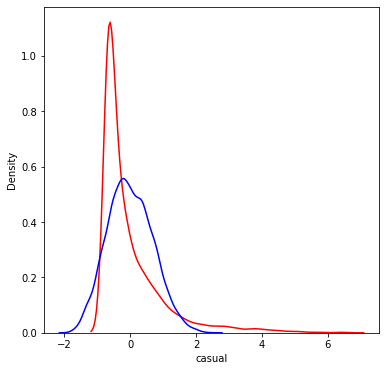

In [328]:
plt.figure(figsize = (6, 6))
ax = sns.kdeplot(y_train_casual, color = 'r', label = 'Actual')
sns.kdeplot(model.fittedvalues, color = 'b', label = 'Fitted', ax = ax)
plt.show()

##### Model Diagnostics

##### Plotting a residual graph of linear fit

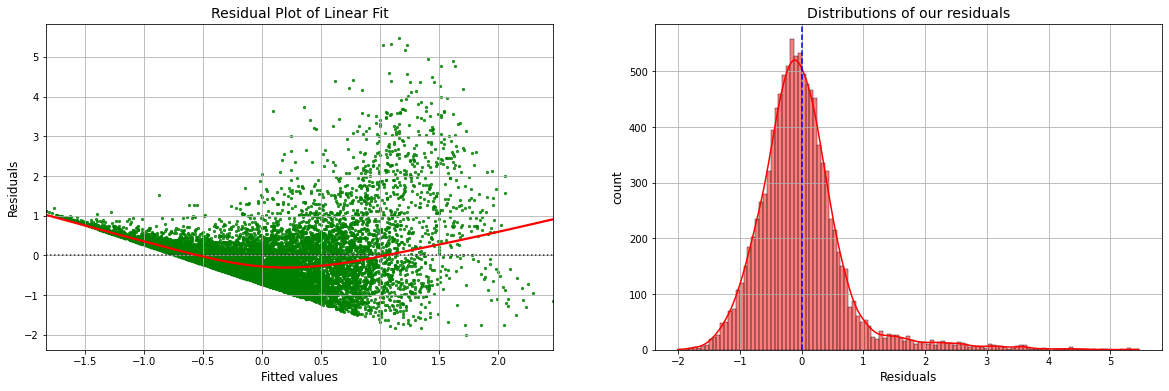

In [329]:
plt.figure(figsize = (20, 6))
residual = y_train_casual - model.fittedvalues
plt.subplot(1, 2, 1)
sns.residplot(x = model.fittedvalues, y = residual, lowess = True, scatter_kws = dict(color = 'g', s = 5, marker = 'o'), line_kws = dict(color = 'r'))
plt.xlabel('Fitted values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residual Plot of Linear Fit', fontsize = '14')
plt.grid()
plt.subplot(1, 2, 2)
ax = sns.histplot((y_train_casual - model.fittedvalues), color = 'r', kde = True)
plt.axvline((y_train_casual - model.fittedvalues).mean(), color = 'b', linestyle = '--')
plt.xlabel('Residuals', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('Distributions of our residuals', fontsize = 14)
plt.grid()
plt.show()

We can see that: 
- Our data is *linear* since there is little pattern in the resudals (no strong U-shape) and therefore a linear fit is the right fit for our data. 
- There is correlation of error-terms (*heteroscedasticity*) since there is a presence of a *funnel shape* in our residual plot. 
- We can see the distribution of our residual follows a $0$ mean and $\sigma^2$ constant variance. 
- We have outliers especially when residues are greater than $2$. 

##### Improving heteroscedasticity

We can make our error terms to have a lower correlation of error by applying: 
- A log transform
- A cubic transform 

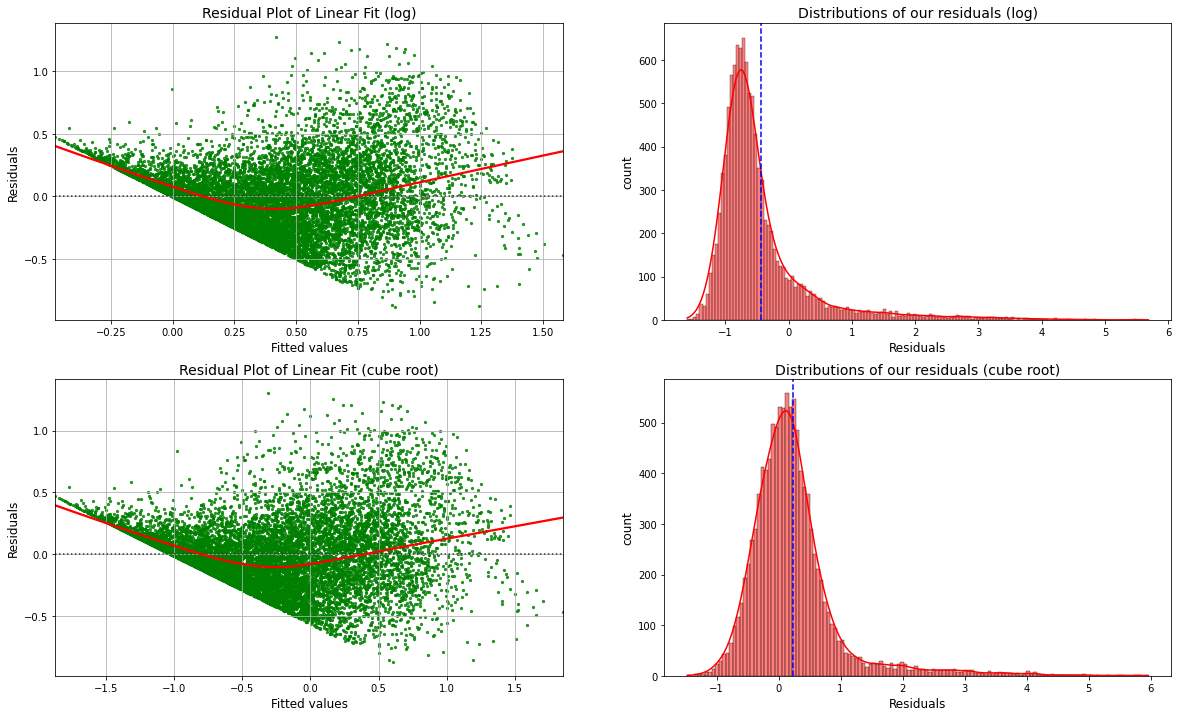

In [347]:
y_train_casual_log = np.log(1 + y_train_casual - min(y_train_casual))
y_train_casual_cbrt = np.cbrt(y_train_casual)
y_train_models = [y_train_casual_log, y_train_casual_cbrt]
name = ['log', 'cube root']
plt.figure(figsize = (20, 12))
count = 1
for element, name_ in zip(y_train_models, name): 
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(element, X_train_sm).fit()
    plt.subplot(2, 2, count)
    residual = y_train_casual_log - model.fittedvalues
    sns.residplot(x = model.fittedvalues, y = residual, lowess = True, scatter_kws = dict(color = 'g', s = 5, marker = 'o'), line_kws = dict(color = 'r'))
    plt.xlabel('Fitted values', fontsize = 12)
    plt.ylabel('Residuals', fontsize = 12)
    plt.title(f'Residual Plot of Linear Fit ({name_})', fontsize = '14')
    plt.grid()
    count += 1
    plt.subplot(2, 2, count)
    ax = sns.histplot((y_train_casual - model.fittedvalues), color = 'r', kde = True)
    plt.axvline((y_train_casual - model.fittedvalues).mean(), color = 'b', linestyle = '--')
    plt.xlabel('Residuals', fontsize = 12)
    plt.ylabel('count', fontsize = 12)
    plt.title(f'Distributions of our residuals ({name_})', fontsize = 14)
    count += 1
plt.show()

**Observations**:
- While there is a funnel shape "curve" in our residual vs fitted values plot for both our transforms, there seems to be less correlation of error terms than previously without transforming the target variable. This can be an indication that ordinary least squares regression might not be the right model to fit our data. 
- We prefer the cube root distribution since residuals are normally distributed with constant variance.  

In [348]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train_casual_cbrt, X_train_sm).fit()

(2948.389866447771, 0.0, 65.91027054511947, 0.0)


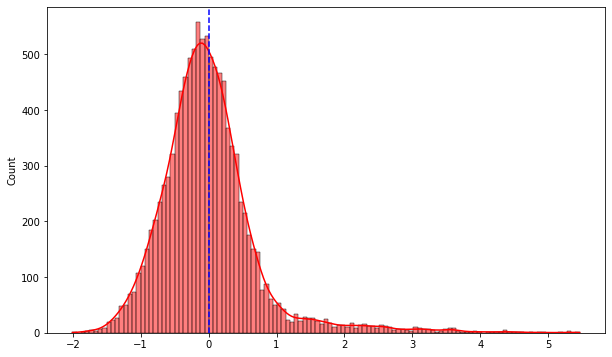

In [265]:
plt.figure(figsize = (10, 6))
ax = sns.histplot((y_train_casual - model.fittedvalues), color = 'r', kde = True)
plt.axvline((y_train_casual - model.fittedvalues).mean(), color = 'b', linestyle = '--')
plt.show()

y_train_casual_log = np.log(1 + y_train_casual - min(y_train_casual))

In [310]:
y_train_casual_log = np.log(1 + y_train_casual - min(y_train_casual))

In [ ]:
sns.residplot(x = model.fittedvalues, y = residual, lowess = True, scatter_kws = dict(color = 'g', s = 5, marker = 'o'), line_kws = dict(color = 'r'))
plt.xlabel('Fitted values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residual Plot of Linear Fit', fontsize = '14')
plt.grid()

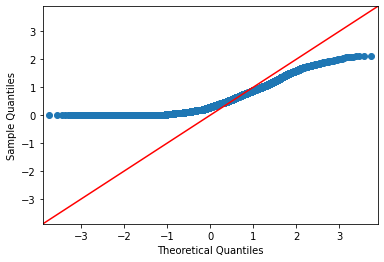

In [277]:
sm.qqplot(y_train_casual_log, line = '45');

In [255]:
sns.histplot(y_train_casual, ax = ax)

<AxesSubplot:xlabel='casual', ylabel='Density'>

In [274]:
y_train_casual_square = np.square(y_train_casual)

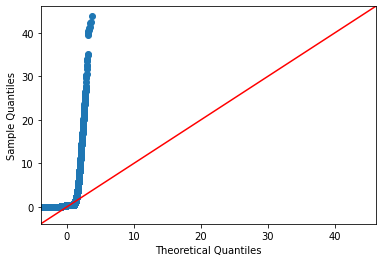

In [275]:
sm.qqplot(y_train_casual_square, line = '45');

##### Assessing multicollinearity

We can assess the presence of multicollinearity by computing the variance inflation factor (VIF) of each feature. 

In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,holiday,1.498544
1,workingday,2.870716
2,weather,1.249825
3,temp,1.111804
4,humidity,1.549384
5,windspeed,1.156537
6,time,1.122116
7,month,1.144042
8,year,1.013504
9,day_no,2.799829


Since the VIF of each variable is less than 5 (with the largest being $2.8$), we can conclude there is little collinearity in our dataset. 

In [283]:
X_train.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'time', 'month', 'year', 'day_no'],
      dtype='object')

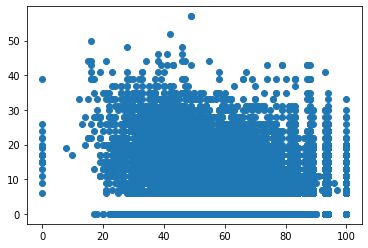

In [286]:
plt.scatter(x = train['humidity'], y = train['windspeed'])

In [301]:
x = input("Print a number: ")
print(x)

5


##### Feature Selection

In [46]:
from sklearn.feature_selection import RFECV

In [59]:
selector = RFECV(estimator=LinearRegression(), step = 1, cv = KFold(n_splits = 5, random_state=1, shuffle = True))
selector = selector.fit(X_train, y_train_casual)

In [60]:
selector.n_features_

8

In [219]:
features = np.array(X_train.columns)
print("All features are: ", features)
reduced_features = []
i = 0 
while (i < len(features)): 
    print(f"Feature: {features[i]}, Selected: {selector.support_[i]}, Ranking: {selector.ranking_[i]}")
    if (selector.support_[i] == True):
        reduced_features.append(features[i])
    i += 1

All features are:  ['holiday' 'workingday' 'weather' 'temp' 'humidity' 'windspeed' 'time'
 'month' 'year' 'day_no']
Feature: holiday, Selected: True, Ranking: 1
Feature: workingday, Selected: True, Ranking: 1
Feature: weather, Selected: True, Ranking: 1
Feature: temp, Selected: True, Ranking: 1
Feature: humidity, Selected: True, Ranking: 1
Feature: windspeed, Selected: False, Ranking: 3
Feature: time, Selected: True, Ranking: 1
Feature: month, Selected: True, Ranking: 1
Feature: year, Selected: True, Ranking: 1
Feature: day_no, Selected: False, Ranking: 2


In [62]:
print("Our features are: ", reduced_features)

Our features are:  ['holiday', 'workingday', 'weather', 'temp', 'humidity', 'time', 'month', 'year']


In [63]:
X_train_casual_reduced = X_train[reduced_features]
X_train_casual_reduced.head()

,holiday,workingday,weather,temp,humidity,time,month,year
0,0.0,0.0,0.0,-1.333661,0.993213,0.000000,0.0,0.0
1,0.0,0.0,0.0,-1.438907,0.941249,0.043478,0.0,0.0
2,0.0,0.0,0.0,-1.438907,0.941249,0.086957,0.0,0.0
3,0.0,0.0,0.0,-1.333661,0.681430,0.130435,0.0,0.0
4,0.0,0.0,0.0,-1.333661,0.681430,0.173913,0.0,0.0


In [220]:
clf = LinearRegression()
clf.fit(X_train_casual_reduced, y_train_casual)
clf.score(X_train_casual_reduced, y_train_casual)

0.46962639651011007

In [221]:
cv = KFold(n_splits = 10, random_state=1, shuffle = True)
scores = cross_val_score(clf, X_train_casual_reduced, y_train_casual, cv = cv)
scores_dict = {0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth', 5: 'sixth', 6: 'seventh', 7: 'eighth', 8: 'ninth', 9: 'tenth'}
i = 0
while (i < len(scores)): 
    print(f"The score when the {scores_dict[i]} fold is a validation set is: {scores[i]}")
    i += 1
print(f"The mean of our scores is {scores.mean()} and standard deviation is {scores.std()}")
print(f"Our confidence interval is ({scores.mean() - 1.96 * scores.std()}, {scores.mean() + 1.96 * scores.std()})")

The score when the first fold is a validation set is: 0.49703524232557517
The score when the second fold is a validation set is: 0.471564624392809
The score when the third fold is a validation set is: 0.48362641300114806
The score when the fourth fold is a validation set is: 0.4658621748528271
The score when the fifth fold is a validation set is: 0.4615764352976074
The score when the sixth fold is a validation set is: 0.4537618285158411
The score when the seventh fold is a validation set is: 0.41028858757381625
The score when the eighth fold is a validation set is: 0.4672168744465923
The score when the ninth fold is a validation set is: 0.49518371548498386
The score when the tenth fold is a validation set is: 0.4604849884643001
The mean of our scores is 0.46666008843554996 and standard deviation is 0.02336063184100425
Our confidence interval is (0.4208732500271816, 0.5124469268439182)


In [80]:
import tensorflow as tf



In [81]:
from sklearn.model_selection import train_test_split

In [82]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train